In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd

# t-test

## Сгенерируем данные из нормального распределения

In [4]:
group_A = np.random.normal(25, 5, size=100)
group_B = np.random.normal(25, 4, size=100)

In [5]:
group_A

array([26.98723975, 25.31712284, 27.05841902, 21.28051444, 25.11882703,
       24.21256388, 24.68526325, 31.91199802, 36.15722409, 20.45907708,
       25.83662069, 16.02124371, 32.79473694, 24.84119204, 13.88237322,
       20.23006516, 33.97051322, 34.39683969, 32.72152055, 26.80338043,
       17.75733696, 21.63321508, 29.60071358, 26.05627753, 28.85038476,
       23.04196609, 23.28066716, 31.91622006, 13.74192282, 13.08774926,
       16.97382922, 30.42460395, 32.14627805, 23.36765596, 19.97385219,
       23.77150164, 36.0908075 , 36.27840322, 25.25800268, 24.24375043,
       31.75342896, 22.16414052, 20.52667119, 26.49676149, 19.71150773,
       29.36033779, 35.29414278, 33.90872137, 23.84644841, 37.12868155,
       27.72108511, 33.26791491, 34.15673325, 24.37895714, 22.33235408,
       31.4746353 , 24.01156015, 30.60273531, 29.82357046, 21.27917243,
       26.79070958, 19.71236818, 25.06727635, 32.30717997, 20.48257597,
       22.91461382, 18.56236232, 27.93320526, 19.35013961, 30.96

In [6]:
print(group_A.mean(), group_B.mean())

25.87941038122606 24.296892283739723


In [7]:
scipy.stats.ttest_ind(group_A, group_B).pvalue

0.030058579293100754

## Изменим средние

In [8]:
group_A = np.random.normal(20, 11, size=100)
group_B = np.random.normal(25, 10, size=100)

In [9]:
scipy.stats.ttest_ind(group_A, group_B).pvalue

0.004102493218987625

## Увеличим размер выборки

In [18]:
group_A = np.random.normal(24, 9, size=1000)
group_B = np.random.normal(25, 10, size=1000)

In [19]:
scipy.stats.ttest_ind(group_A, group_B).pvalue

0.04112532033307511

## Давайте теперь возьмем данные из ненормального распределения

In [20]:
group_A = np.random.gamma(1, 2, size = 100)
group_B = np.random.gamma(1, 2, size = 100)

In [21]:
print(group_A.mean(), group_B.mean())

2.1247718554775594 2.345031682694967


(array([18., 20., 13.,  9.,  7.,  6.,  6.,  5.,  3.,  3.,  0.,  0.,  1.,
         1.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.0240826 ,  0.45810294,  0.89212328,  1.32614363,  1.76016397,
         2.19418431,  2.62820465,  3.062225  ,  3.49624534,  3.93026568,
         4.36428602,  4.79830637,  5.23232671,  5.66634705,  6.10036739,
         6.53438774,  6.96840808,  7.40242842,  7.83644876,  8.27046911,
         8.70448945,  9.13850979,  9.57253013, 10.00655047, 10.44057082,
        10.87459116, 11.3086115 , 11.74263184, 12.17665219, 12.61067253,
        13.04469287, 13.47871321, 13.91273356]),
 <BarContainer object of 32 artists>)

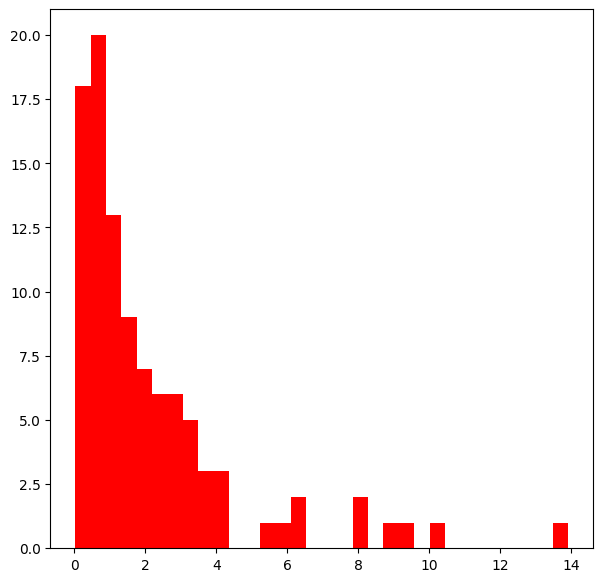

In [22]:
plt.figure(figsize=(7,7))
plt.hist(group_A, bins = 32, color='red',  linewidth=2)
#plt.grid(True)
#sns.kdeplot(group_A, color = 'blue', linewidth=3);

In [23]:
scipy.stats.ttest_ind(group_A, group_B).pvalue

0.5204729213420471

In [24]:
group_A = np.random.gamma(1, 25, size = 1000)
group_B =  np.random.gamma(1, 27, size = 1000)

In [25]:
print(group_A.mean(), group_B.mean())

25.377821002688066 26.390026480088782


In [26]:
scipy.stats.ttest_ind(group_A, group_B).pvalue

0.39503279165919736

## t-test работает не корректно ?

# Мощность и корректность

## Посчитаем корректность критерия - процент случаев, в которых на a/a тесте критерий срабатывает

In [88]:
p_values = []
iters = 1000
for _ in range(10000):
    group_A = np.random.normal(25, 5, size=1000)
    group_B = np.random.normal(25, 4, size=1000)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])

0.0488


(array([ 970., 1037., 1002., 1026.,  964.,  957.,  975., 1074., 1039.,
         956.]),
 array([8.75232575e-05, 1.00075619e-01, 2.00063715e-01, 3.00051811e-01,
        4.00039906e-01, 5.00028002e-01, 6.00016098e-01, 7.00004194e-01,
        7.99992289e-01, 8.99980385e-01, 9.99968481e-01]),
 <BarContainer object of 10 artists>)

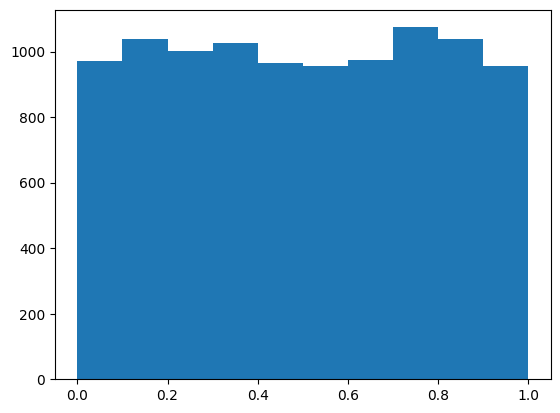

In [89]:
plt.hist(p_values)

## Критерий применять можно, распределение корректное

## Повысим порог отвержения нулевой гипотезы, чтобы понять, почему распределение должно быть равномерным

In [90]:
p_values = []
iters = 1000
alpha = 0.1
for _ in range(iters):
    group_A = np.random.normal(25, 5, size=1000)
    group_B = np.random.normal(25, 4, size=1000)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < alpha].shape[0] / p_values.shape[0])

0.108


In [92]:
p_values

array([0.25172557, 0.51362818, 0.4842218 , 0.13826422, 0.96596276,
       0.12771812, 0.33257067, 0.85771987, 0.67844256, 0.73405606,
       0.72483006, 0.65316545, 0.35174728, 0.84716676, 0.04579559,
       0.58068026, 0.64028388, 0.75256017, 0.23646327, 0.53286226,
       0.2601569 , 0.5501991 , 0.80842518, 0.970905  , 0.40351805,
       0.31342578, 0.36859517, 0.429896  , 0.8619982 , 0.04746227,
       0.6391054 , 0.75339517, 0.86037113, 0.55899593, 0.79789129,
       0.83560029, 0.07226048, 0.69553161, 0.34434089, 0.1083443 ,
       0.76988994, 0.26111445, 0.13351379, 0.5494534 , 0.35906218,
       0.95998286, 0.43956428, 0.06405052, 0.52396063, 0.65520622,
       0.55106432, 0.17718154, 0.02458611, 0.22142537, 0.11239197,
       0.11940469, 0.57933882, 0.63715119, 0.90466228, 0.02689387,
       0.35177859, 0.87763061, 0.25756731, 0.3151528 , 0.30868284,
       0.36114807, 0.80032937, 0.22948741, 0.8673504 , 0.06942994,
       0.21457243, 0.09356584, 0.02747455, 0.65570395, 0.76250

(array([109., 100., 114.,  99., 101.,  84.,  91.,  99., 100., 103.]),
 array([0.00158623, 0.1013068 , 0.20102736, 0.30074793, 0.40046849,
        0.50018906, 0.59990963, 0.69963019, 0.79935076, 0.89907132,
        0.99879189]),
 <BarContainer object of 10 artists>)

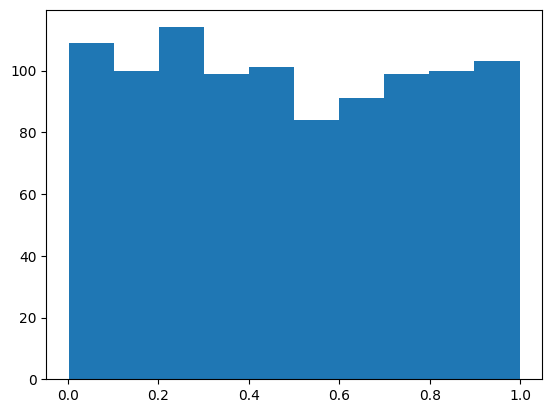

In [91]:
plt.hist(p_values)

## Построим график процента ложноположительных срабатываний от порога для p-value

In [93]:
alpha_list = [i * 0.1 for i in range(0,10)]
false_posititve_list = []
iters = 1000
for alpha in alpha_list:
    p_values = []
    for _ in range(iters):
        group_A = np.random.normal(25, 5, size=1000)
        group_B = np.random.normal(25, 4, size=1000)
        p = scipy.stats.ttest_ind(group_A, group_B).pvalue
        p_values.append(p)
    p_values = np.array(p_values)
    false_posititve_list.append(p_values[p_values < alpha].shape[0] / p_values.shape[0])

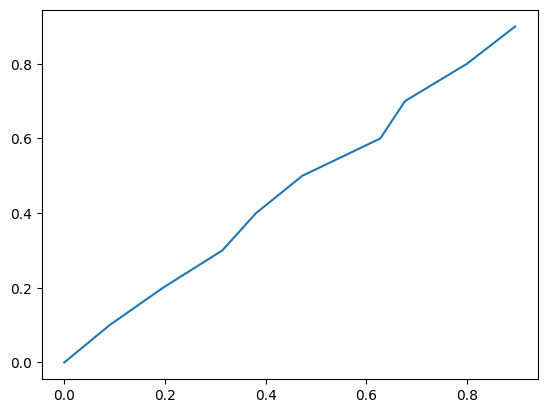

In [94]:
plt.plot(false_posititve_list, alpha_list)

## Сделаем выборки разными c разными дисперсиями

0.0


(array([   4.,   21.,  100.,  267.,  564.,  968., 1351., 1874., 2351.,
        2500.]),
 array([0.15952262, 0.24356712, 0.32761162, 0.41165612, 0.49570062,
        0.57974512, 0.66378962, 0.74783412, 0.83187862, 0.91592311,
        0.99996761]),
 <BarContainer object of 10 artists>)

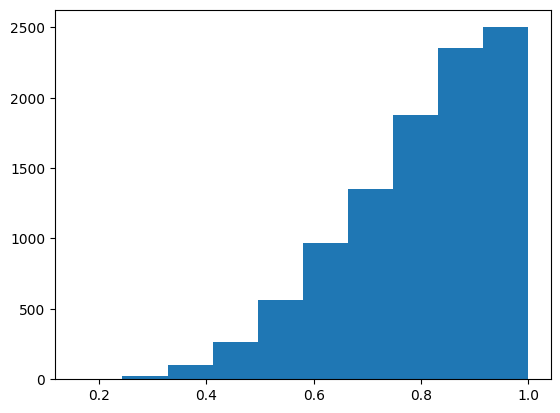

In [95]:
p_values = []
iters = 1000
for _ in range(10000):
    group_A = np.random.normal(25, 1, size=100)
    group_B = np.random.normal(25, 10, size=1000)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Что не так?

0.0449


(array([ 969., 1027.,  995.,  978., 1035., 1036., 1030.,  997.,  961.,
         972.]),
 array([8.53855316e-06, 9.99961868e-02, 1.99983835e-01, 2.99971483e-01,
        3.99959131e-01, 4.99946780e-01, 5.99934428e-01, 6.99922076e-01,
        7.99909724e-01, 8.99897372e-01, 9.99885021e-01]),
 <BarContainer object of 10 artists>)

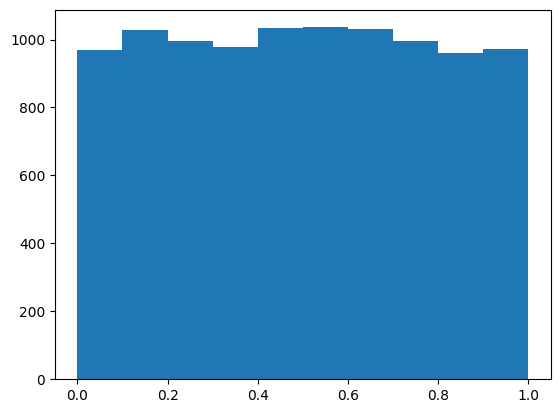

In [96]:
p_values = []
iters = 1000
for _ in range(10000):
    group_A = np.random.normal(25, 1, size=100)
    group_B = np.random.normal(25, 10, size=1000)
    p = scipy.stats.ttest_ind(group_A, group_B, equal_var=False).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Все работает

## Посчитаем мощность. То есть процент раз,когда мы нашли эффект,когда он реально есть

0.1078


(array([1864., 1257., 1073.,  951.,  832.,  848.,  817.,  785.,  803.,
         770.]),
 array([2.55465815e-06, 9.99933323e-02, 1.99984110e-01, 2.99974887e-01,
        3.99965665e-01, 4.99956443e-01, 5.99947220e-01, 6.99937998e-01,
        7.99928776e-01, 8.99919553e-01, 9.99910331e-01]),
 <BarContainer object of 10 artists>)

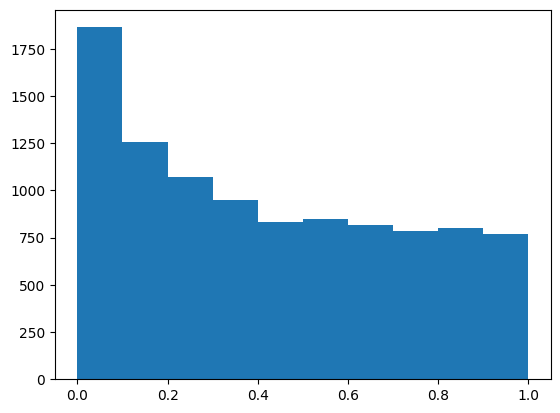

In [100]:
p_values = []
iters = 1000
for _ in range(10000):
    group_A = np.random.normal(24, 10, size=100)
    group_B = np.random.normal(25, 10, size=100)
    p = scipy.stats.ttest_ind(group_A, group_B, equal_var=False).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Сделаем снова одинаковым размер групп

1.0


(array([9.999e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.16320760e-49, 2.28963547e-21, 4.57927094e-21, 6.86890641e-21,
        9.15854188e-21, 1.14481774e-20, 1.37378128e-20, 1.60274483e-20,
        1.83170838e-20, 2.06067192e-20, 2.28963547e-20]),
 <BarContainer object of 10 artists>)

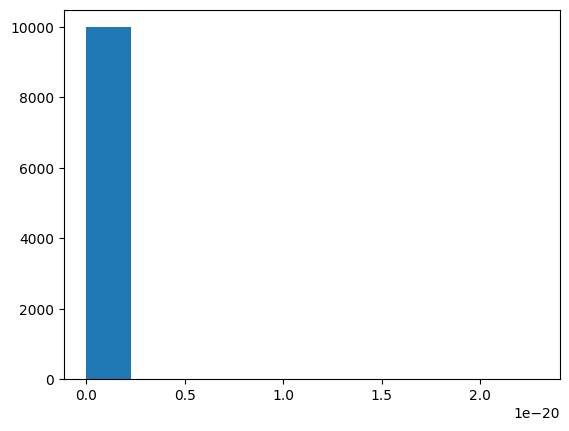

In [103]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(45, 10, size=100)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Мощность очень маленькая

## Увеличим разницу

0.7641


(array([8510.,  700.,  296.,  172.,  100.,   82.,   32.,   43.,   32.,
          33.]),
 array([3.01183339e-10, 9.97686067e-02, 1.99537213e-01, 2.99305820e-01,
        3.99074426e-01, 4.98843032e-01, 5.98611639e-01, 6.98380245e-01,
        7.98148852e-01, 8.97917458e-01, 9.97686064e-01]),
 <BarContainer object of 10 artists>)

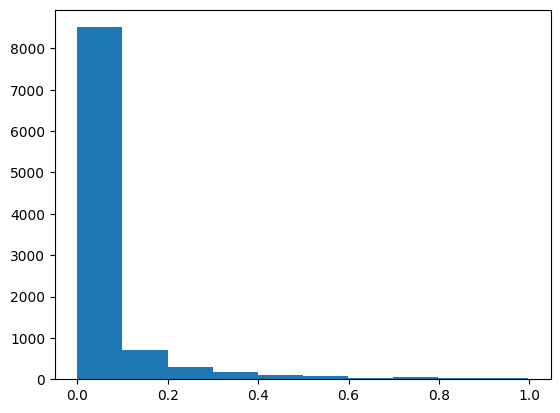

In [27]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(21, 11, size=100)
    group_B = np.random.normal(25, 10, size=100)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Увеличим выборку

0.9907


(array([9.945e+03, 2.700e+01, 1.100e+01, 1.000e+01, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2.18059348e-15, 7.51965003e-02, 1.50393001e-01, 2.25589501e-01,
        3.00786001e-01, 3.75982501e-01, 4.51179002e-01, 5.26375502e-01,
        6.01572002e-01, 6.76768502e-01, 7.51965003e-01]),
 <BarContainer object of 10 artists>)

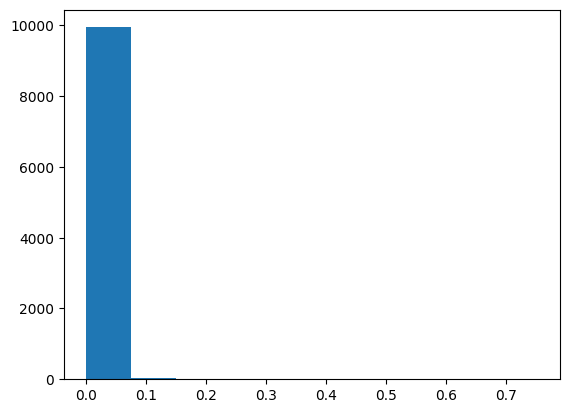

In [28]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=1000)
    group_B = np.random.normal(25, 10, size=1000)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

# Критерий Манна-Уитни

In [104]:
x = np.random.lognormal(10,2,100)

(array([73., 11.,  2.,  5.,  2.,  1.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.28930723e+02, 7.76765756e+04, 1.55124221e+05, 2.32571865e+05,
        3.10019510e+05, 3.87467155e+05, 4.64914800e+05, 5.42362445e+05,
        6.19810090e+05, 6.97257735e+05, 7.74705380e+05, 8.52153025e+05,
        9.29600669e+05, 1.00704831e+06, 1.08449596e+06, 1.16194360e+06,
        1.23939125e+06, 1.31683889e+06, 1.39428654e+06, 1.47173418e+06,
        1.54918183e+06, 1.62662947e+06, 1.70407712e+06, 1.78152476e+06,
        1.85897241e+06, 1.93642005e+06, 2.01386770e+06, 2.09131534e+06,
        2.16876299e+06, 2.24621063e+06, 2.32365828e+06, 2.40110592e+06,
        2.47855357e+06]),
 <BarContainer object of 32 artists>)

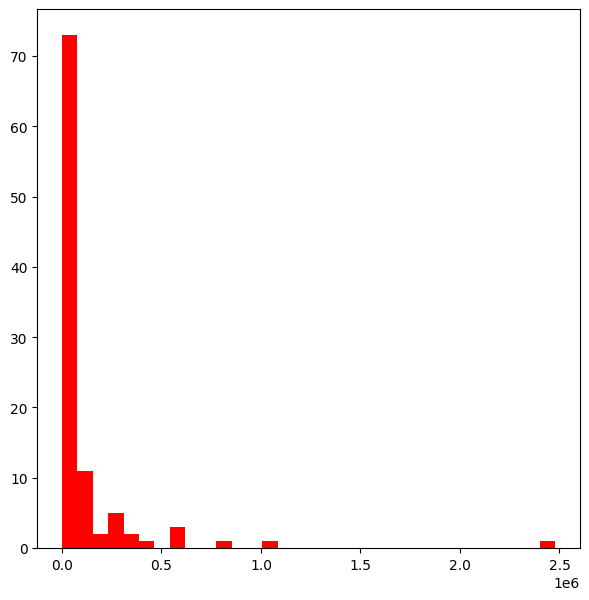

In [105]:
plt.figure(figsize=(7,7))
plt.hist(x, bins = 32, color='red',  linewidth=2)

0.0288


(array([ 828., 1309., 1347., 1383., 1092.,  897.,  833.,  800.,  774.,
         737.]),
 array([0.00144868, 0.10129787, 0.20114705, 0.30099624, 0.40084542,
        0.5006946 , 0.60054379, 0.70039297, 0.80024215, 0.90009134,
        0.99994052]),
 <BarContainer object of 10 artists>)

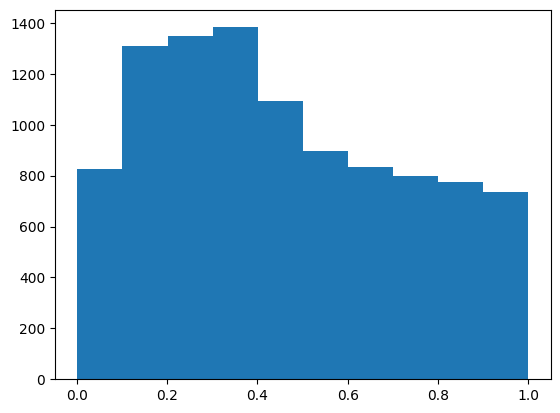

In [106]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.lognormal(10,2,100)
    group_B = np.random.lognormal(10,2,100)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## критерий применять не корректно, распределение p-value распределенно не равномерно. Попробуем выбрать непараметрический критерий

0.0519


(array([1034., 1002.,  999., 1015.,  993.,  941., 1048., 1008., 1003.,
         957.]),
 array([8.92963052e-05, 1.00080367e-01, 2.00071437e-01, 3.00062507e-01,
        4.00053578e-01, 5.00044648e-01, 6.00035719e-01, 7.00026789e-01,
        8.00017859e-01, 9.00008930e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

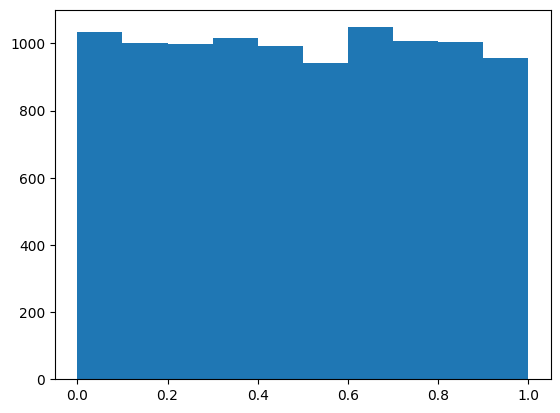

In [107]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.lognormal(10,2,100)
    group_B = np.random.lognormal(10,2,100)
    p = scipy.stats.mannwhitneyu(group_A, group_B,alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Непараметрический критерий сработал хорошо!

## оценим мощность

0.7698


(array([8547.,  645.,  286.,  165.,  118.,   75.,   60.,   45.,   30.,
          29.]),
 array([2.27072634e-10, 9.99025231e-02, 1.99805046e-01, 2.99707569e-01,
        3.99610092e-01, 4.99512615e-01, 5.99415138e-01, 6.99317660e-01,
        7.99220183e-01, 8.99122706e-01, 9.99025229e-01]),
 <BarContainer object of 10 artists>)

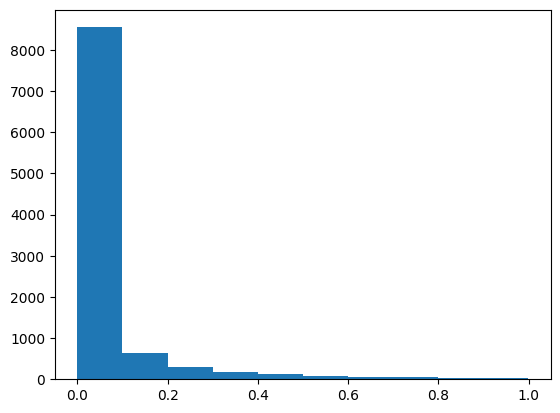

In [108]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.lognormal(9,3,100)
    group_B = np.random.lognormal(10,2,100)
    p = scipy.stats.mannwhitneyu(group_A, group_B,alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

In [109]:
print(group_A.mean(), group_B.mean())

729118.833154964 91580.12856273932


## Когда критерий Манна-Уитни будет плох?

0.084


(array([149., 130.,  98., 112.,  88.,  85.,  92.,  86.,  81.,  79.]),
 array([4.42433018e-05, 9.99423419e-02, 1.99840440e-01, 2.99738539e-01,
        3.99636638e-01, 4.99534736e-01, 5.99432835e-01, 6.99330933e-01,
        7.99229032e-01, 8.99127131e-01, 9.99025229e-01]),
 <BarContainer object of 10 artists>)

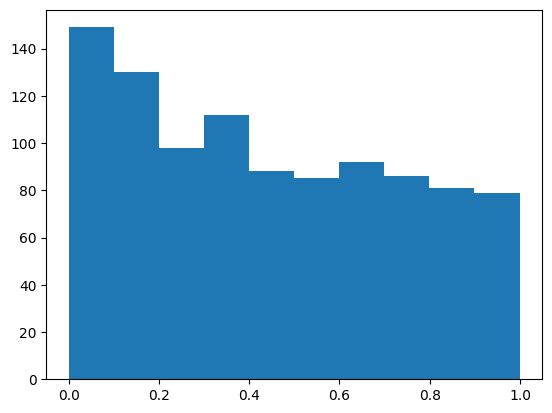

In [110]:
p_values = []
iters = 1000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 1, size=100)
    p = scipy.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Почему распределение такое?

(array([ 2.,  2.,  9., 13., 21., 13., 11., 16.,  7.,  6.]),
 array([20.34983302, 20.83817701, 21.326521  , 21.81486499, 22.30320898,
        22.79155297, 23.27989696, 23.76824095, 24.25658494, 24.74492893,
        25.23327292]),
 <BarContainer object of 10 artists>)

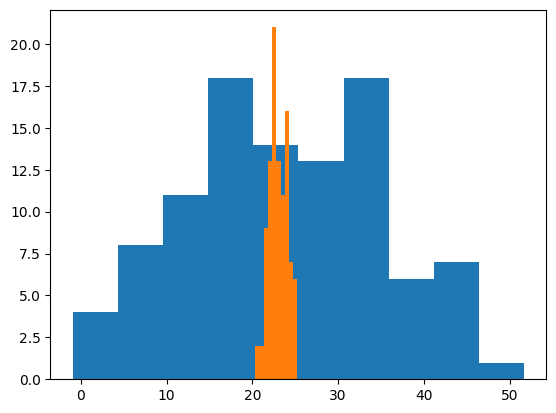

In [111]:
plt.hist(group_A)
plt.hist(group_B)

## Теперь сделаем выборки 'похожими' по распределению

0.0521


(array([1062., 1020., 1006.,  946., 1009.,  990.,  975.,  958., 1043.,
         991.]),
 array([2.83801164e-04, 1.00255421e-01, 2.00227041e-01, 3.00198661e-01,
        4.00170281e-01, 5.00141901e-01, 6.00113520e-01, 7.00085140e-01,
        8.00056760e-01, 9.00028380e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

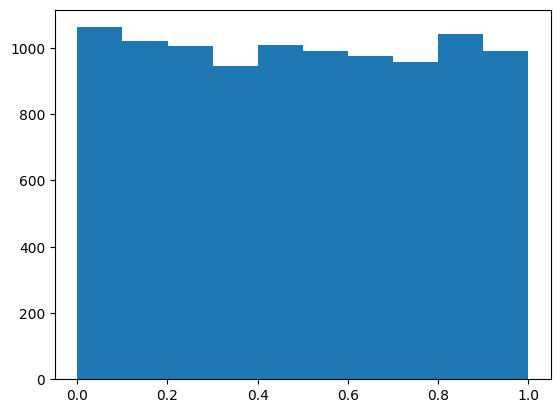

In [112]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 11, size=100)
    p = scipy.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Когда еще хорошо применять этот критерий?

0.0495


(array([ 989., 1060., 1015.,  983.,  972., 1087.,  958.,  988.,  838.,
        1110.]),
 array([3.38194810e-04, 1.00304375e-01, 2.00270556e-01, 3.00236736e-01,
        4.00202917e-01, 5.00169097e-01, 6.00135278e-01, 7.00101458e-01,
        8.00067639e-01, 9.00033819e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

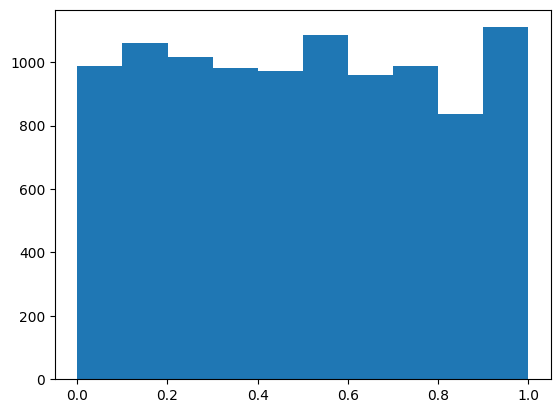

In [113]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(23, 10, size=20)
    group_B = np.random.normal(23, 11, size=20)
    p = scipy.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

 # q-q plot

Text(0.5, 1.0, 'Q-Q plot')

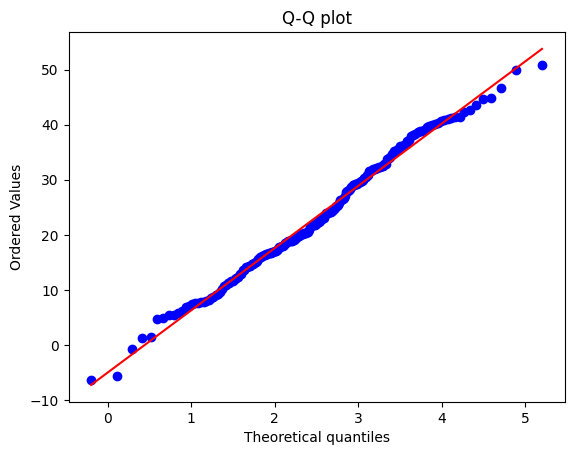

In [115]:
group_B = np.random.normal(23, 11, size=200)
fig = plt.figure()
ax = fig.add_subplot(111)
x = group_B
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot")

Text(0.5, 1.0, 'Q-Q plot')

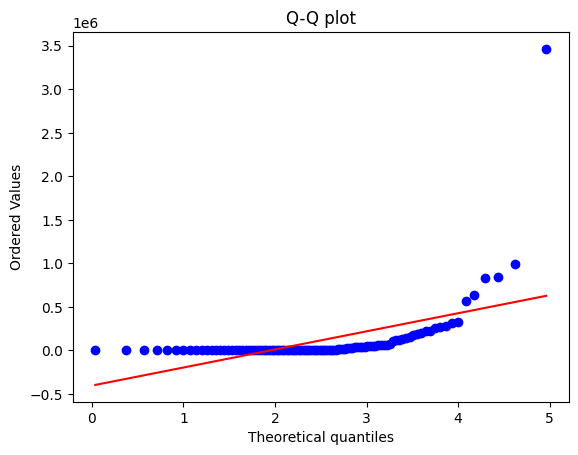

In [116]:
group_B = np.random.lognormal(9,3,100)
fig = plt.figure()
ax = fig.add_subplot(111)
x = group_B
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot")

# z-test

In [117]:
from statsmodels.stats.proportion import proportions_ztest

In [118]:
iters = 1000
group_A = np.random.binomial(1, 0.1, size =iters)
group_B = np.random.binomial(1, 0.1, size =iters)
count = np.array([np.sum(group_A), np.sum(group_B)])
nobs = np.array([iters, iters])
z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-score = {z} \n p-value = {p:.15f}'.format(z=z,p=p))

 z-score = -1.8430870578588152 
 p-value = 0.065316300639254


In [119]:
group_A

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
count

array([ 90, 115])

In [121]:
nobs

array([1000, 1000])

In [46]:
nobs

array([1000, 1000])

0.0436


(array([ 917.,  971.,  992., 1016., 1015.,  967., 1089., 1046., 1042.,
         945.]),
 array([1.63805604e-05, 1.00014743e-01, 2.00013104e-01, 3.00011466e-01,
        4.00009828e-01, 5.00008190e-01, 6.00006552e-01, 7.00004914e-01,
        8.00003276e-01, 9.00001638e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

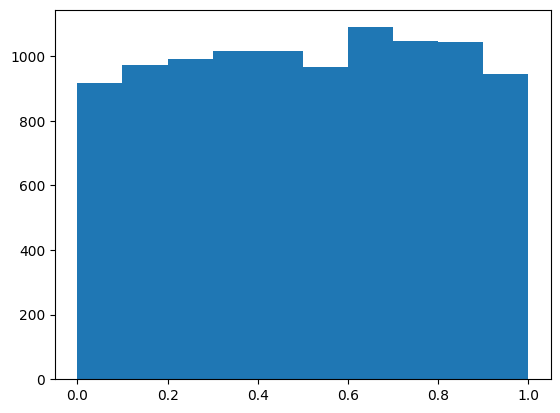

In [122]:
p_values = []
iters = 10000
size = 5000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.1, size =size)
    group_B = np.random.binomial(1, 0.1, size =size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

0.9941


(array([9.966e+03, 2.600e+01, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.79022031e-16, 9.02741134e-02, 1.80548227e-01, 2.70822340e-01,
        3.61096453e-01, 4.51370567e-01, 5.41644680e-01, 6.31918794e-01,
        7.22192907e-01, 8.12467020e-01, 9.02741134e-01]),
 <BarContainer object of 10 artists>)

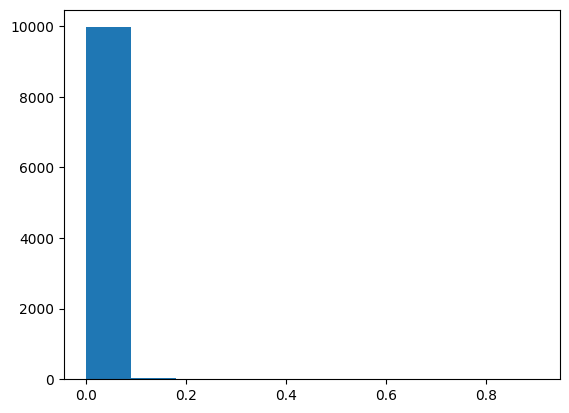

In [127]:
p_values = []
iters = 10000
size = 50000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.01, size =size)
    group_B = np.random.binomial(1, 0.013, size =size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## Увеличим разницу

0.9346


(array([9.645e+03, 2.110e+02, 7.400e+01, 2.900e+01, 2.500e+01, 4.000e+00,
        6.000e+00, 0.000e+00, 2.000e+00, 4.000e+00]),
 array([1.30523044e-11, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

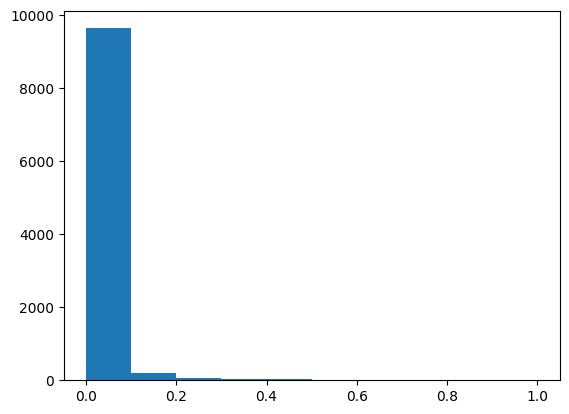

In [128]:
p_values = []
iters = 10000
size = 5000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.08, size =size)
    group_B = np.random.binomial(1, 0.1, size =size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

# Перестановочный критерий

0.0465


(array([ 976.,  966., 1016.,  984., 1021.,  945.,  986., 1066., 1043.,
         997.]),
 array([1.48246774e-05, 1.00007141e-01, 1.99999456e-01, 2.99991772e-01,
        3.99984088e-01, 4.99976404e-01, 5.99968720e-01, 6.99961036e-01,
        7.99953352e-01, 8.99945668e-01, 9.99937983e-01]),
 <BarContainer object of 10 artists>)

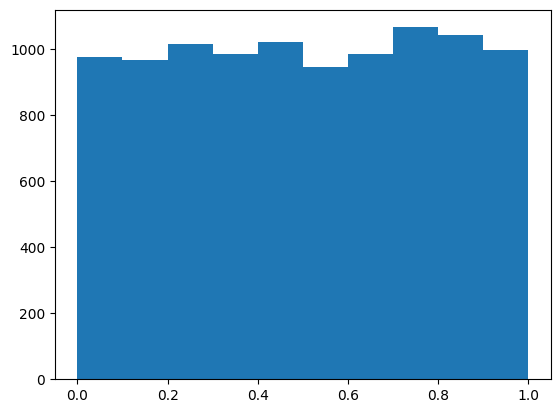

In [129]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(10,3,100)
    group_B = np.random.normal(10,2,100)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

## добавим выбросы

0.061


(array([1149., 1091.,  991., 1012.,  996.,  965.,  909.,  925.,  981.,
         981.]),
 array([4.52186264e-06, 1.00000912e-01, 1.99997303e-01, 2.99993693e-01,
        3.99990084e-01, 4.99986474e-01, 5.99982865e-01, 6.99979255e-01,
        7.99975645e-01, 8.99972036e-01, 9.99968426e-01]),
 <BarContainer object of 10 artists>)

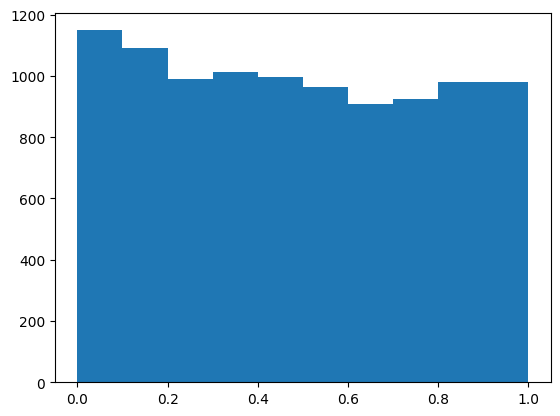

In [130]:
p_values = []
iters = 10000
for _ in range(iters):
    data_un = list(np.random.normal(10,3,50))
    data_in = [13, 14, 15]
    group_A = np.array(data_un + data_in)
    group_B = np.random.normal(10,3,50)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

In [52]:
def combination_test(data_fst, data_snd, iters=1000, plot=True):
    data = np.array(list(data_fst) + list(data_snd))
    size = len(data)
    values = []
    fst_ratio = len(data_fst) * 1. / size
    for _ in range(iters):
        mask = (np.random.random(size=size) < fst_ratio)
        values.append(data[mask].mean() - data[~mask].mean())
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return (np.abs(values) > np.abs(data_fst.mean() - data_snd.mean())).mean()

0.06


(array([115., 104.,  93.,  98.,  94.,  89.,  99., 107.,  99., 102.]),
 array([0.    , 0.0999, 0.1998, 0.2997, 0.3996, 0.4995, 0.5994, 0.6993,
        0.7992, 0.8991, 0.999 ]),
 <BarContainer object of 10 artists>)

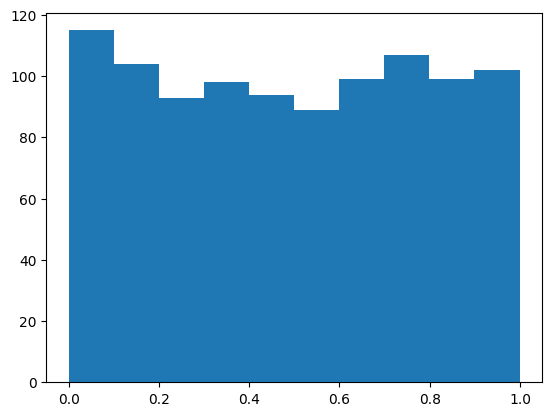

In [131]:
p_values = []
iters = 1000
for _ in range(iters):
    data_un = list(np.random.normal(10,3,50))
    data_in = [13, 14, 15]
    group_A = np.array(data_un + data_in)
    group_B = np.random.normal(10,3,50)
    p = combination_test(group_A, group_B, plot = False)
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

# Критерий Колмогорова-Смирнова

## Проверим равномернность распределения с помощью критерия Колмогорова-Смирнова

0.104


(array([170., 106.,  93.,  88.,  89., 102.,  93.,  80.,  90.,  89.]),
 array([3.85690603e-05, 9.97422815e-02, 1.99445994e-01, 2.99149706e-01,
        3.98853419e-01, 4.98557131e-01, 5.98260844e-01, 6.97964556e-01,
        7.97668268e-01, 8.97371981e-01, 9.97075693e-01]),
 <BarContainer object of 10 artists>)

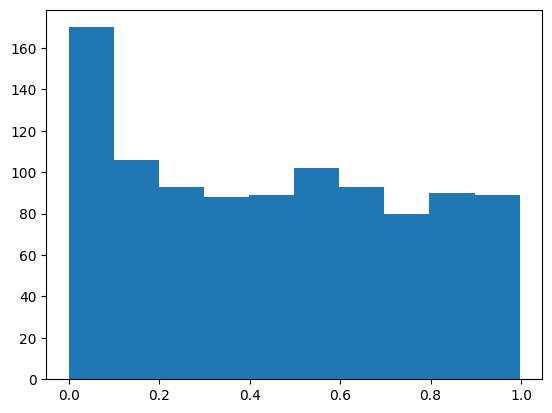

In [132]:
p_values = []
iters = 1000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 1, size=100)
    p = scipy.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

In [133]:
scipy.stats.kstest(p_values, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.08751169703792022, pvalue=4.109975599820617e-07)

0.0487


(array([ 990.,  994.,  951., 1009., 1048., 1043.,  966., 1018.,  975.,
        1006.]),
 array([5.03964862e-05, 1.00036759e-01, 2.00023122e-01, 3.00009485e-01,
        3.99995848e-01, 4.99982210e-01, 5.99968573e-01, 6.99954936e-01,
        7.99941299e-01, 8.99927661e-01, 9.99914024e-01]),
 <BarContainer object of 10 artists>)

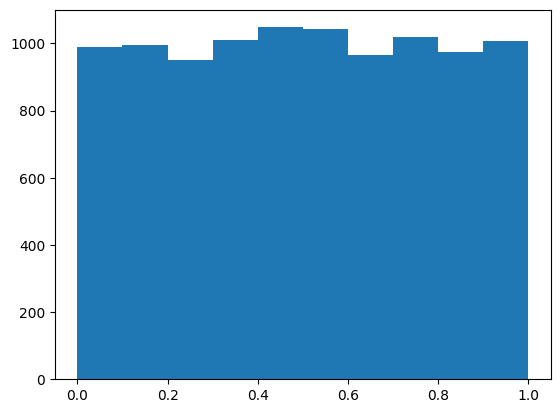

In [134]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(10,3,100)
    group_B = np.random.normal(10,2,100)
    p = scipy.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])
plt.hist(p_values)

In [135]:
scipy.stats.kstest(p_values, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.007893751242813107, pvalue=0.5587946867226854)